In [1]:
from ISLP import load_data
import pandas as pd
import matplotlib.pyplot as plt
from ISLP.models import ModelSpec as MS, summarize
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import numpy as np
from numpy import log
import statsmodels .api as sm

# Task:

Exercises from Chapter 3: Linear Regression in An Introduction to Statistical Learning with Applications in Python (Springer, 2023), Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani:

Exercises: 8, 9, 10 (a-g), 11 (a-c), 13, 14 (a-f)

In [2]:
auto = load_data('Auto')
print(auto.head())

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  


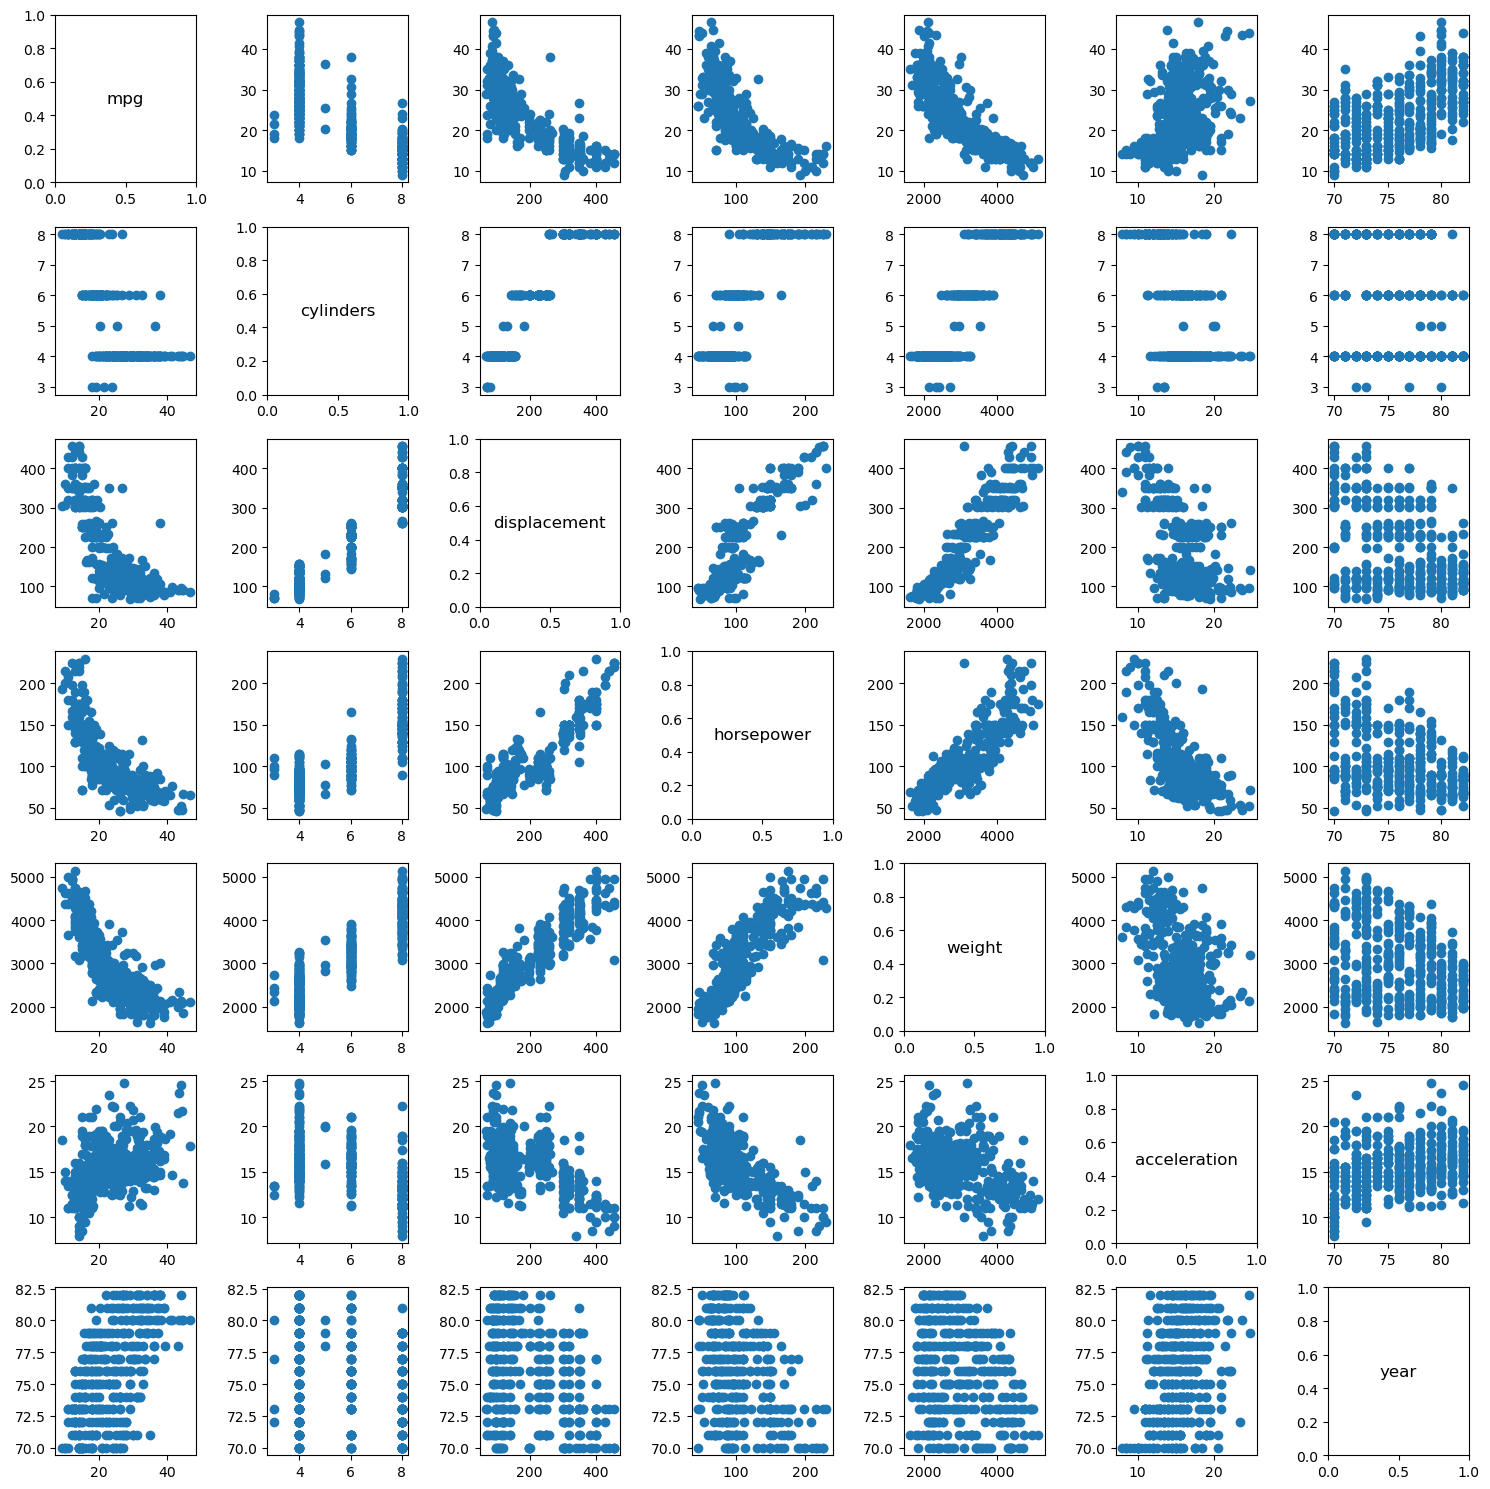

In [3]:
fig, axes = plt.subplots(len(auto.columns)-1, len(auto.columns)-1, figsize=(15, 15))
for i, col1 in enumerate(auto.columns[:-1]):
    for j, col2 in enumerate(auto.columns[:-1]):
        if i != j:
            axes[i, j].scatter(auto[col2], auto[col1])
        else:
            axes[i, j].text(0.5, 0.5, col1, ha='center', va='center', fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
correlation_matrix = auto.corr()

print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

In [5]:
terms = ['horsepower', 'displacement', 'weight', 'acceleration', 'year', 'origin', 'cylinders']
y = auto['mpg']
X = MS(terms).fit_transform(auto)

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
horsepower,-0.0170,0.014,-1.230,0.220
displacement,0.0199,0.008,2.647,0.008
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000
cylinders,-0.4934,0.323,-1.526,0.128


In [6]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [7]:
model = smf.ols('mpg ~ horsepower + displacement + weight + acceleration + year + origin + cylinders', data=auto).fit()

anova_results = anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
horsepower      1.0  14433.077597  14433.077597  1303.392471  1.703467e-125
displacement    1.0   1390.577701   1390.577701   125.577410   2.077346e-25
weight          1.0   1015.312409   1015.312409    91.688730   1.282358e-19
acceleration    1.0      0.612558      0.612558     0.055318   8.141812e-01
year            1.0   2424.424288   2424.424288   218.939886   1.608789e-39
origin          1.0    276.984895    276.984895    25.013378   8.678389e-07
cylinders       1.0     25.791491     25.791491     2.329125   1.277965e-01
Residual      384.0   4252.212530     11.073470          NaN            NaN


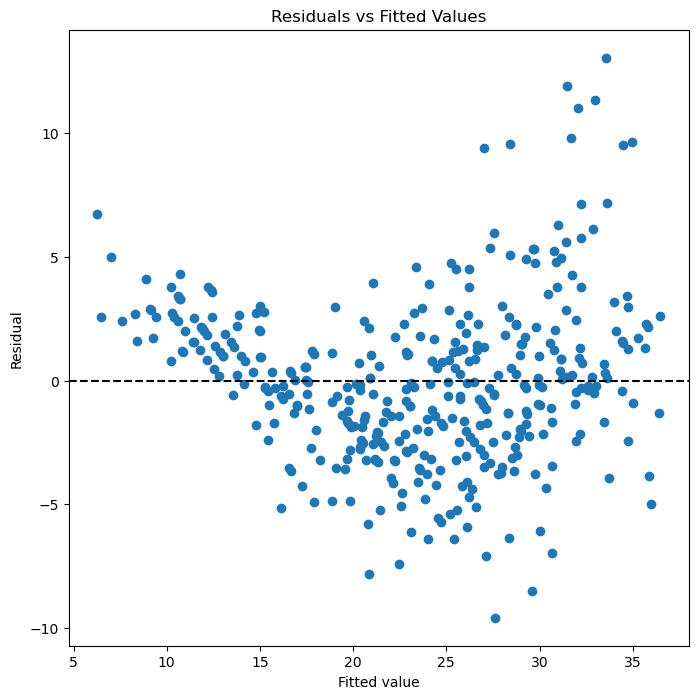

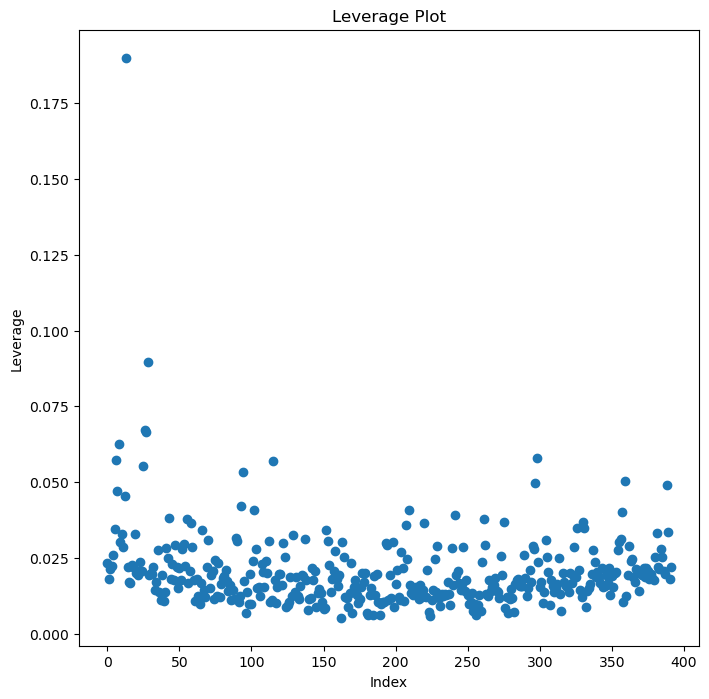

13

In [8]:
infl = results.get_influence()
residuals = results.resid
fitted_values = results.fittedvalues

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(fitted_values, residuals)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, color='k', linestyle='--')
ax.set_title('Residuals vs Fitted Values')
plt.show()

hat_matrix_diag = infl.hat_matrix_diag
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(len(hat_matrix_diag)), hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Leverage Plot')
plt.show()

np.argmax(hat_matrix_diag)

In [9]:
terms_1 = ['horsepower', 'weight', ('horsepower', 'weight')]
X1 = MS(terms_1).fit_transform(auto)
model_1 = sm.OLS(y, X1)
summarize(model_1.fit())

,coef,std err,t,P>|t|
intercept,63.557900,2.343000,27.127,0.0
horsepower,-0.250800,0.027000,-9.195,0.0
weight,-0.010800,0.001000,-13.921,0.0
horsepower:weight,0.000054,0.000007,8.054,0.0


In [10]:
terms_2 = ['displacement', 'year', ('displacement', 'year')]
X2 = MS(terms_2).fit_transform(auto)
model_2 = sm.OLS(y, X2)
summarize(model_2.fit())

,coef,std err,t,P>|t|
intercept,-72.8784,8.368,-8.709,0.0
displacement,0.2523,0.041,6.216,0.0
year,1.4077,0.110,12.779,0.0
displacement:year,-0.0041,0.001,-7.482,0.0


In [11]:
terms_3 = ['horsepower', 'weight', 'acceleration', ('horsepower', 'weight'), ('weight', 'acceleration')]
X3 = MS(terms_3).fit_transform(auto)
model_3 = sm.OLS(y, X3)
summarize(model_3.fit())

,coef,std err,t,P>|t|
intercept,71.384400,8.055000,8.862,0.000
horsepower,-0.281800,0.034000,-8.169,0.000
weight,-0.012000,0.003000,-4.383,0.000
acceleration,-0.372800,0.378000,-0.985,0.325
horsepower:weight,0.000058,0.000009,6.670,0.000
weight:acceleration,0.000071,0.000000,0.556,0.578


In [12]:
auto['log_horsepower'] = log(auto['horsepower'])
auto['log_weight'] = log(auto['weight'])

X_log = MS(['log_horsepower', 'log_weight']).fit_transform(auto)
model_log = sm.OLS(y, X_log).fit()
summarize(model_log)

,coef,std err,t,P>|t|
intercept,179.9729,7.420,24.255,0.0
log_horsepower,-7.6725,1.210,-6.340,0.0
log_weight,-15.2435,1.478,-10.316,0.0


In [13]:
from numpy import sqrt

auto['sqrt_horsepower'] = sqrt(auto['horsepower'])
auto['sqrt_weight'] = sqrt(auto['weight'])

X_sqrt = MS(['sqrt_horsepower', 'sqrt_weight']).fit_transform(auto)
model_sqrt = sm.OLS(y, X_sqrt).fit()
summarize(model_sqrt)

,coef,std err,t,P>|t|
intercept,68.4973,1.491,45.941,0.0
sqrt_horsepower,-1.2708,0.237,-5.367,0.0
sqrt_weight,-0.5971,0.055,-10.813,0.0


In [14]:
from numpy import power

auto['horsepower_squared'] = power(auto['horsepower'], 2)
auto['weight_squared'] = power(auto['weight'], 2)

X_squared = MS(['horsepower', 'weight', 'horsepower_squared', 'weight_squared']).fit_transform(auto)
model_squared = sm.OLS(y, X_squared).fit()
summarize(model_squared)


,coef,std err,t,P>|t|
intercept,64.444400,2.850000e+00,22.608,0.0
horsepower,-0.216300,3.900000e-02,-5.495,0.0
weight,-0.012600,2.000000e-03,-5.468,0.0
horsepower_squared,0.000600,0.000000e+00,4.092,0.0
weight_squared,0.000001,3.480000e-07,3.610,0.0


In [15]:
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm

Carseats = load_data('Carseats')

terms = ['Price', 'Urban', 'US']
y = Carseats['Sales']
X = MS(terms).fit_transform(Carseats)

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [16]:
significant_terms = ['Price', 'US']
X_reduced = MS(significant_terms).fit_transform(Carseats)

model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()
summarize(results_reduced)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [17]:
conf_intervals = results_reduced.conf_int(alpha=0.05)
print(conf_intervals)

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


### Zadanie 13

In [18]:
import numpy as np

np.random.seed(1)
x = np.random.normal(0, 1, 100)

In [19]:
eps = np.random.normal(0, 0.5, 100)

In [20]:
y = -1 + 0.5 * x + eps
print(f"Długość wektora y: {len(y)}")

Długość wektora y: 100


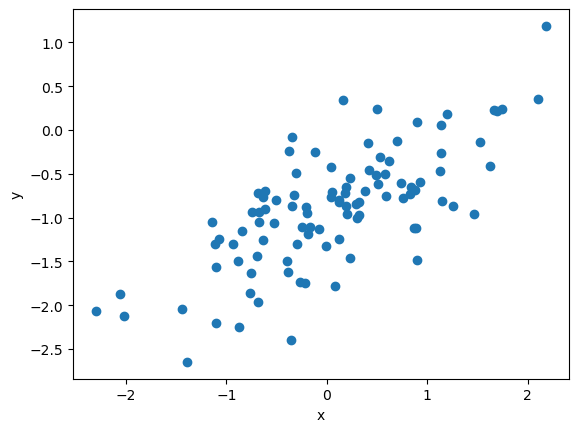

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
summarize(model)

,coef,std err,t,P>|t|
const,-0.9265,0.047,-19.717,0.0
x1,0.5477,0.053,10.342,0.0


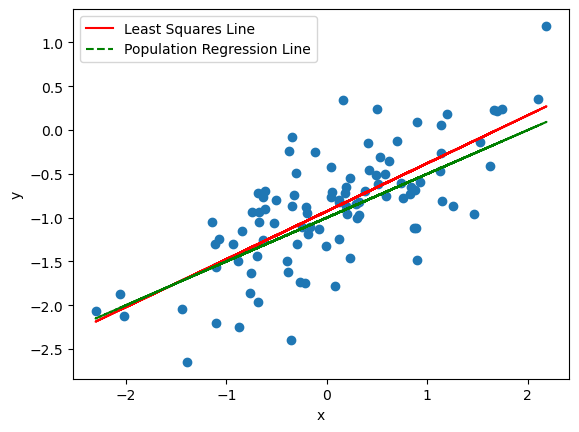

In [23]:
plt.scatter(x, y)
plt.plot(x, model.fittedvalues, color='red', label='Least Squares Line')
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label='Population Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [24]:
x2 = x**2
X_poly = np.column_stack((X, x2))
model_poly = sm.OLS(y, X_poly).fit()
summarize(model_poly)

,coef,std err,t,P>|t|
const,-0.9325,0.058,-16.158,0.000
x1,0.5468,0.053,10.229,0.000
x2,0.0077,0.043,0.181,0.856


In [25]:
eps_less_noise = np.random.normal(0, 0.1, 100)
y_less_noise = -1 + 0.5 * x + eps_less_noise

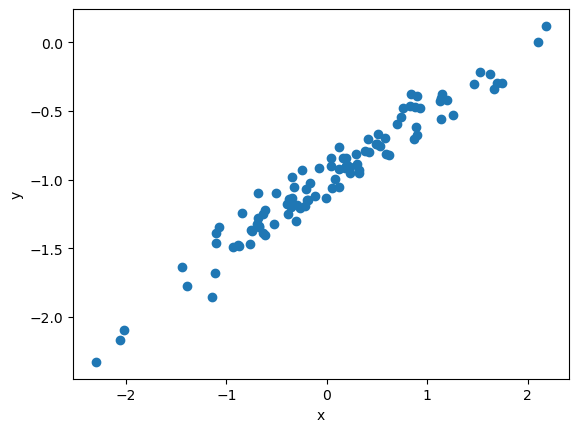

In [26]:
plt.scatter(x, y_less_noise)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
X = sm.add_constant(x)
model_less_noise = sm.OLS(y_less_noise, X).fit()
summarize(model_less_noise)

,coef,std err,t,P>|t|
const,-0.9988,0.010,-98.222,0.0
x1,0.4959,0.011,43.268,0.0


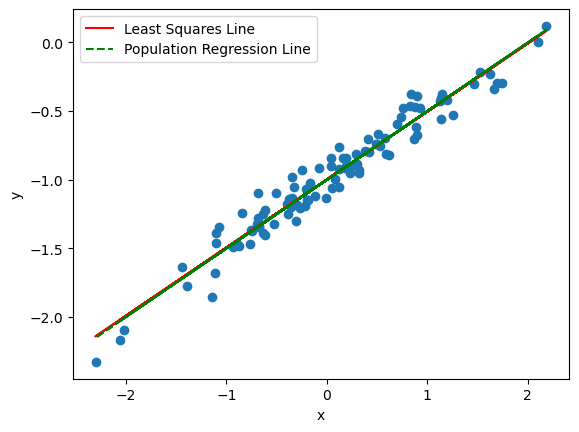

In [28]:
plt.scatter(x, y_less_noise)
plt.plot(x, model_less_noise.fittedvalues, color='red', label='Least Squares Line')
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label='Population Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
eps_more_noise = np.random.normal(0, 1, 100)
y_more_noise = -1 + 0.5 * x + eps_more_noise

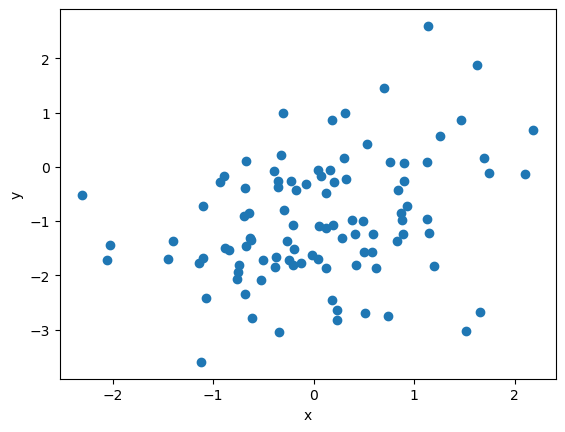

In [30]:
plt.scatter(x, y_more_noise)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
model_more_noise = sm.OLS(y_more_noise, X).fit()
summarize(model_more_noise)

,coef,std err,t,P>|t|
const,-1.0140,0.107,-9.445,0.000
x1,0.3943,0.121,3.259,0.002


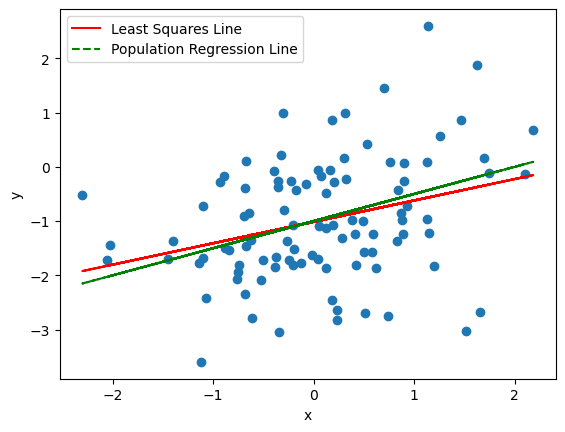

In [32]:
plt.scatter(x, y_more_noise)
plt.plot(x, model_more_noise.fittedvalues, color='red', label='Least Squares Line')
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label='Population Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
conf_int_original = model.conf_int()
conf_int_less_noise = model_more_noise.conf_int()
conf_int_more_noise = model_less_noise.conf_int()

print("Oryginalny zestaw danych:", conf_int_original)
print("Mniejszy szum:", conf_int_less_noise)
print("Większy szum:", conf_int_more_noise)

Oryginalny zestaw danych: [[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]
Mniejszy szum: [[-1.22700729 -0.80091614]
 [ 0.15422192  0.63447234]]
Większy szum: [[-1.01894809 -0.97859004]
 [ 0.4731502   0.51863806]]
